<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming for Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.2 - Exploratory data analysis
</div>

In [1]:
import numpy as np
import pandas as pd
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
from matplotlib.colors import TwoSlopeNorm

In [2]:
processed_df = pd.read_csv('./../data/Processed.csv', index_col=0)

In [3]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_number          2747 non-null   int64  
 1   quantity_ordered      2747 non-null   int64  
 2   price_per_unit        2747 non-null   float64
 3   orderline_number      2747 non-null   int64  
 4   sales                 2747 non-null   float64
 5   order_date            2747 non-null   object 
 6   days_since_lastorder  2747 non-null   int64  
 7   status                2747 non-null   object 
 8   productline           2747 non-null   object 
 9   retail_price          2747 non-null   int64  
 10  product_code          2747 non-null   object 
 11  customer_name         2747 non-null   object 
 12  phone                 2747 non-null   object 
 13  address               2747 non-null   object 
 14  city                  2747 non-null   object 
 15  postalcode           

In [4]:
processed_df["order_date"] = pd.to_datetime(processed_df["order_date"],dayfirst = True)
processed_df

,order_number,quantity_ordered,price_per_unit,orderline_number,sales,order_date,days_since_lastorder,status,productline,retail_price,product_code,customer_name,phone,address,city,postalcode,country,last_name,first_name,deal_size
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small


# Question: Thông tin phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp

## Step 1: Purpose

Qua tìm hiểu, ta có thể phân loại khách hàng theo lợi ích mang lại cho doanh nghiệp như sau:
- Khách hàng trung thành: Đây là nhóm mang lại gần như trên 70% doanh thu cho doanh nghiệp. Nhóm khách hàng này cần vô cùng tin tưởng sử dụng dịch vụ của doanh nghiệp. cần có những chính sách đặc biệt để giữ chân nhóm khách hàng này.
- ~~Khách hàng tiềm năng: Đây là nhóm đối tượng đã/đang sử dụng sản phẩm/dịch vụ của doanh nghiệp hoặc có thể chỉ là nhóm đối tượng chuẩn bị trở thành khách hàng của doanh nghiệp. Nhóm này sẽ mang lại lợi ích trong tương lai nếu có những chiến lược thúc đẩy doanh số phù hợp, cần những chính sách thu hút đặc biệt.~~ (Không đủ thông tin để xác định)
- Khách hàng mang lại giá trị lợi ích nhỏ: Đây là nhóm mang lại doanh thu thấp cho doanh nghiệp. Nhóm này đa phần tập trung vào giá cả thấp và những loại hàng có giá trị nhỏ.
- Khách hàng tiêu cực: Nhóm khách hàng này gồm những đối tượng mua hàng khó tính, có thể là một số khách hàng mua hàng một lần,...

## Step 2: Analyzing

In [5]:
cleaned_df1 = processed_df.groupby(['phone','customer_name','first_name','last_name']).sum(numeric_only=True)['sales'].sort_values(ascending=False)
cleaned_df1.head(43).sum()/cleaned_df1.sum()

0.6971644858260091

In [6]:
cleaned_df1 = cleaned_df1.reset_index().drop(columns='sales').head(43)
cleaned_df1

,phone,customer_name,first_name,last_name
0,(91) 555 94 44,Euro Shopping Channel,Diego,Freyre
1,4155551450,Mini Gifts Distributors Ltd.,Valarie,Nelson
2,03 9520 4555,"Australian Collectors, Co.",Peter,Ferguson
3,2125557413,Muscle Machine Inc,Jeff,Young
4,40.67.8555,La Rochelle Gifts,Janine,Labrune
5,+65 221 7555,"Dragon Souveniers, Ltd.",Eric,Natividad
6,2125557818,Land of Toys Inc.,Kwai,Yu
7,4085553659,The Sharp Gifts Warehouse,Sue,Frick
8,(171) 555-1555,"AV Stores, Co.",Victoria,Ashworth
9,02 9936 8555,"Anna's Decorations, Ltd",Anna,O'Hara


In [7]:
cleaned_df2 = processed_df.groupby(['phone','customer_name','first_name','last_name']).sum(numeric_only=True)['sales'].sort_values(ascending=False)
cleaned_df2 = cleaned_df2.reset_index().drop(columns='sales').iloc[43:]
cleaned_df2

,phone,customer_name,first_name,last_name
43,2125551500,Vitachrome Inc.,Michael,Frick
44,7605558146,Collectable Mini Designs Co.,Valarie,Thompson
45,9145554562,Mini Classics,Steve,Frick
46,+49 69 66 90 2555,"Blauer See Auto, Co.",Roland,Keitel
47,2155559857,Motor Mint Distributors Inc.,Rosa,Hernandez
48,2015559350,Tekni Collectables Inc.,William,Brown
49,6175559555,Gifts4AllAges.com,Juri,Yoshido
50,7025551838,Signal Gift Stores,Sue,King
51,6175558555,Collectables For Less Inc.,Allen,Nelson
52,88.60.1555,Mini Caravy,Frederique,Citeaux


In [8]:
cleaned_df3 = processed_df.groupby(['phone','customer_name',
                                    'first_name','last_name','order_number']).count().reset_index()[['phone','customer_name',
                                                                                                     'first_name','last_name','order_number']]
cleaned_df3 = cleaned_df3.groupby(['phone','customer_name','first_name','last_name']).count()
cleaned_df3 = cleaned_df3[cleaned_df3['order_number']<=2].reset_index()[['phone','customer_name','first_name','last_name']]
cleaned_df3

,phone,customer_name,first_name,last_name
0,(171) 555-7555,"Double Decker Gift Stores, Ltd",Thomas,Hardy
1,(198) 555-8888,giftsbymail.co.uk,Helen,Bennett
2,(604) 555-3392,Canadian Gift Exchange Network,Yoshi,Tannamuri
3,(604) 555-4555,"Royal Canadian Collectables, Ltd.",Elizabeth,Lincoln
4,(95) 555 82 82,"Iberia Gift Imports, Corp.",Jose Pedro,Roel
5,+34 913 728 555,CAF Imports,Jesus,Fernandez
6,+353 1862 1555,"Clover Collections, Co.",Dean,Cassidy
7,+47 2212 1555,"Norway Gifts By Mail, Co.",Jan,Klaeboe
8,+49 89 61 08 9555,"Bavarian Collectables Imports, Co.",Michael,Donnermeyer
9,+81 06 6342 5555,Osaka Souveniers Co.,Mory,Kentary


## Step 3: Visualization

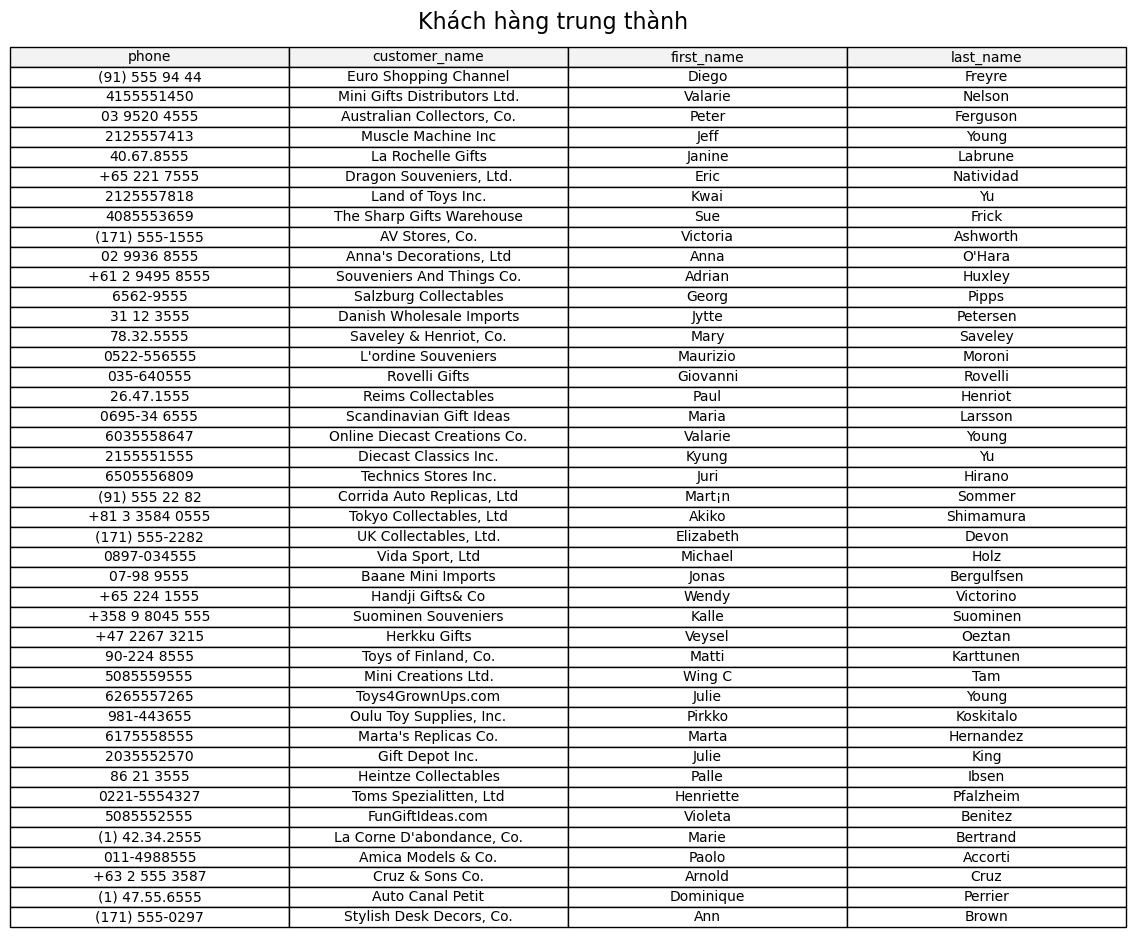

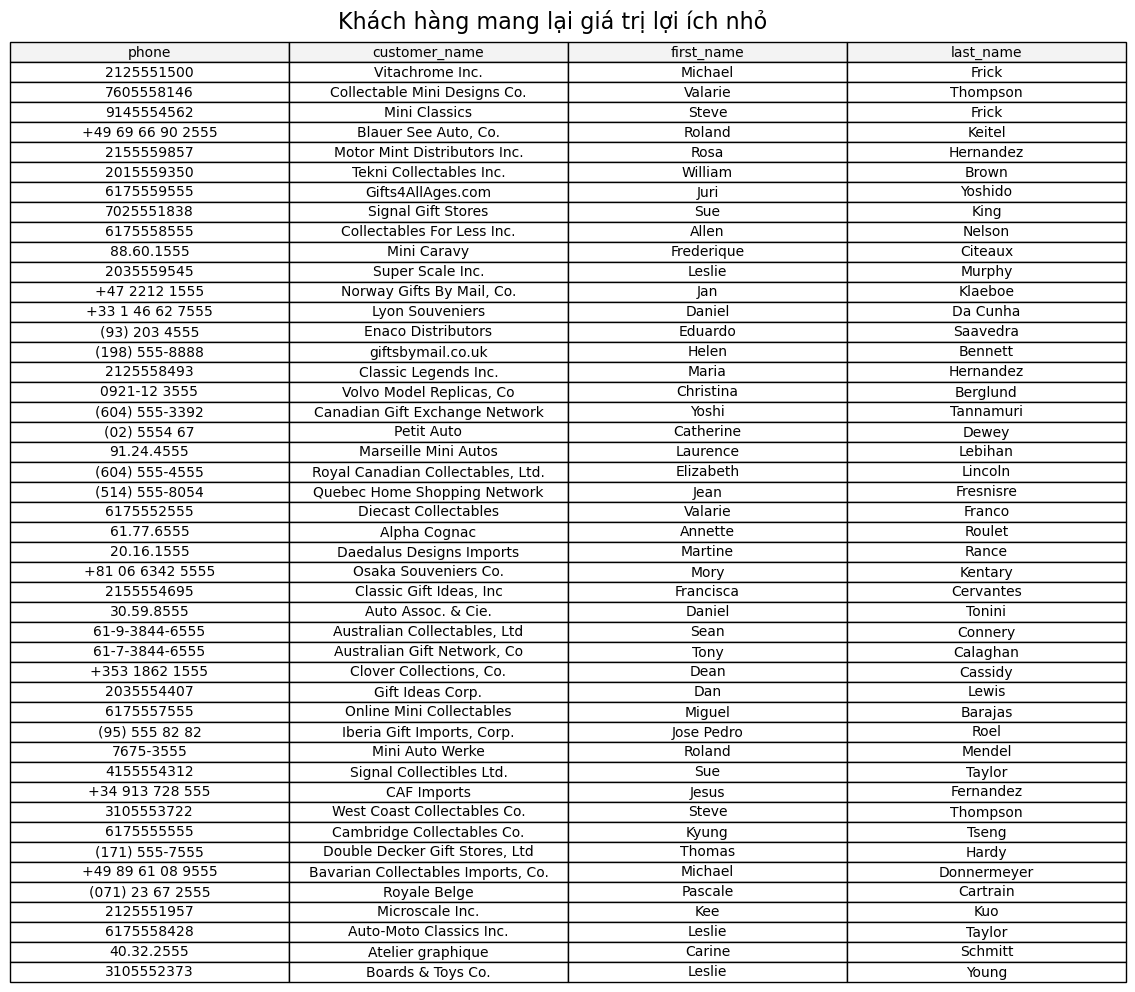

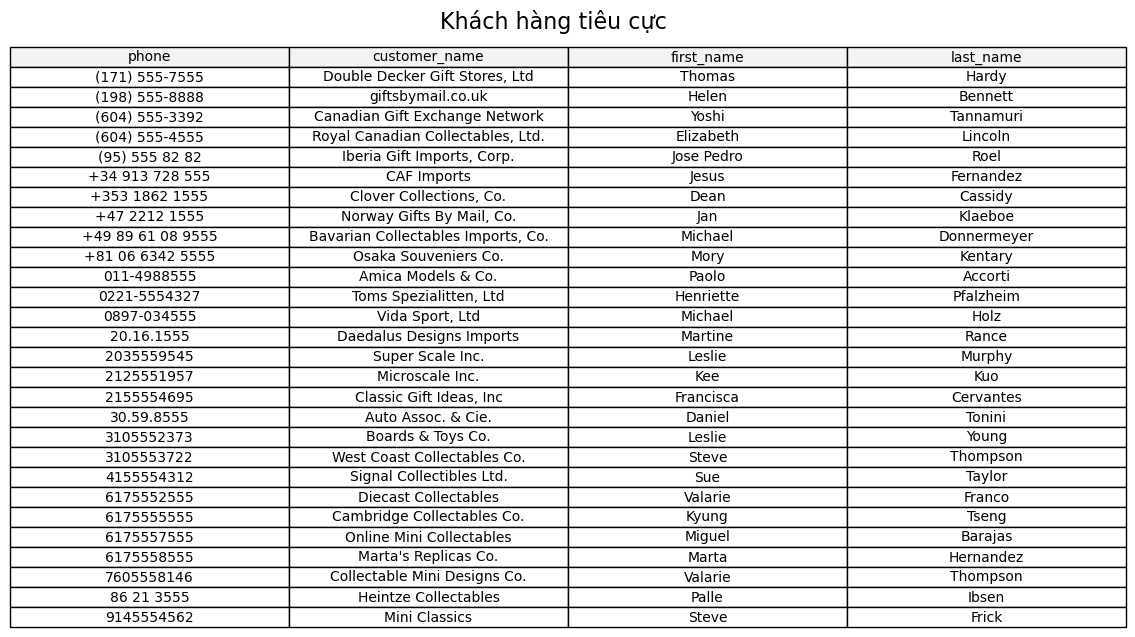

In [9]:
# Plot 1
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Khách hàng trung thành', fontsize=16, y=1.45)
ax.axis('off')
table = ax.table(cellText=cleaned_df1.values,
                 colLabels=cleaned_df1.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f3f3f3']*len(cleaned_df1.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Plot 2
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Khách hàng mang lại giá trị lợi ích nhỏ', fontsize=16, y=1.5)
ax.axis('off')
table = ax.table(cellText=cleaned_df2.values,
                 colLabels=cleaned_df2.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f3f3f3']*len(cleaned_df2.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Plot 3
fig, ax = plt.subplots(figsize=(12, 5))
fig.suptitle('Khách hàng tiêu cực', fontsize=16, y=1.15)
ax.axis('off')
table = ax.table(cellText=cleaned_df3.values,
                 colLabels=cleaned_df3.columns,
                 cellLoc='center',
                 loc='center',
                 colColours=['#f3f3f3']*len(cleaned_df3.columns))
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

## Step 4: Give observations

Qua trực quan hóa, ta có thể biết được thông tin khách hàng thuộc những nhóm khách hàng khác nhau, từ đó có thể đưa ra chiến lược phù hợp để có thể tối đa hóa lợi nhuận cho công ty:
- Đối với khách hàng trung thành:
    - Cung cấp ưu đãi đặc biệt và giảm giá cho khách hàng thường xuyên.
    - Tạo chương trình thưởng hoặc điểm tích lũy để khuyến khích sự trung thành.
    - Tổ chức sự kiện đặc biệt hoặc trải nghiệm độc quyền cho khách hàng trung thành.
- Đối với khách hàng mang lại giá trị lợi ích nhỏ:
    - Tập trung vào việc cung cấp giải pháp hiệu quả và giá trị đối với họ.
    - Tối ưu hóa trải nghiệm mua sắm và dịch vụ khách hàng để làm cho quá trình mua sắm trở nên thuận lợi.
    - Gửi thông điệp về giá trị và lợi ích cụ thể của sản phẩm hoặc dịch vụ.
- Đối với khách hàng tiêu cực:
    - Lắng nghe và hiểu rõ nhu cầu cụ thể của họ để đáp ứng mọi yêu cầu.
    - Cung cấp dịch vụ khách hàng tận tâm và chuyên nghiệp.
    - Tạo ra các sản phẩm hoặc dịch vụ có thể tùy chỉnh để đáp ứng mong muốn đặc biệt của họ.

# Question: Doanh số bán hàng theo từng quốc gia

## Step 1: Purpose

- Dùng để biết được sự phân bố của doanh số bán hàng theo từng quốc gia là như thế nào:
    - Khu vực nào đóng góp vào doanh số bán hàng là nhiều nhất.
    - Khu vực nào bắt đầu được khai thác để tạo ra lợi ích (doanh thu ít).
    - Khu vực nào đang có tiềm năng để khai thác nhưng chưa được khai thác.

## Step 2: Analyzing

In [10]:
cleaned_df = processed_df.groupby(['country']).sum(numeric_only=True)['sales']
cleaned_df = cleaned_df.rename(index={'USA': 'United States of America','UK': 'United Kingdom'})
cleaned_df

country
Australia                    630623.10
Austria                      202062.53
Belgium                      108412.62
Canada                       224078.56
Denmark                      245637.15
Finland                      329581.91
France                      1110916.52
Germany                      220472.09
Ireland                       57756.43
Italy                        374674.31
Japan                        188167.81
Norway                       307463.70
Philippines                   94015.73
Singapore                    288488.41
Spain                       1215686.92
Sweden                       210014.21
Switzerland                  117713.56
United Kingdom               478880.46
United States of America    3355575.69
Name: sales, dtype: float64

In [11]:
gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf['sales'] = 0
for country in cleaned_df.index:
    gdf.loc[gdf.name == country, 'sales'] = cleaned_df[country]
### Missing Singapore

/tmp/ipykernel_2347/3743934022.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gdf = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


## Step 3: Visualization

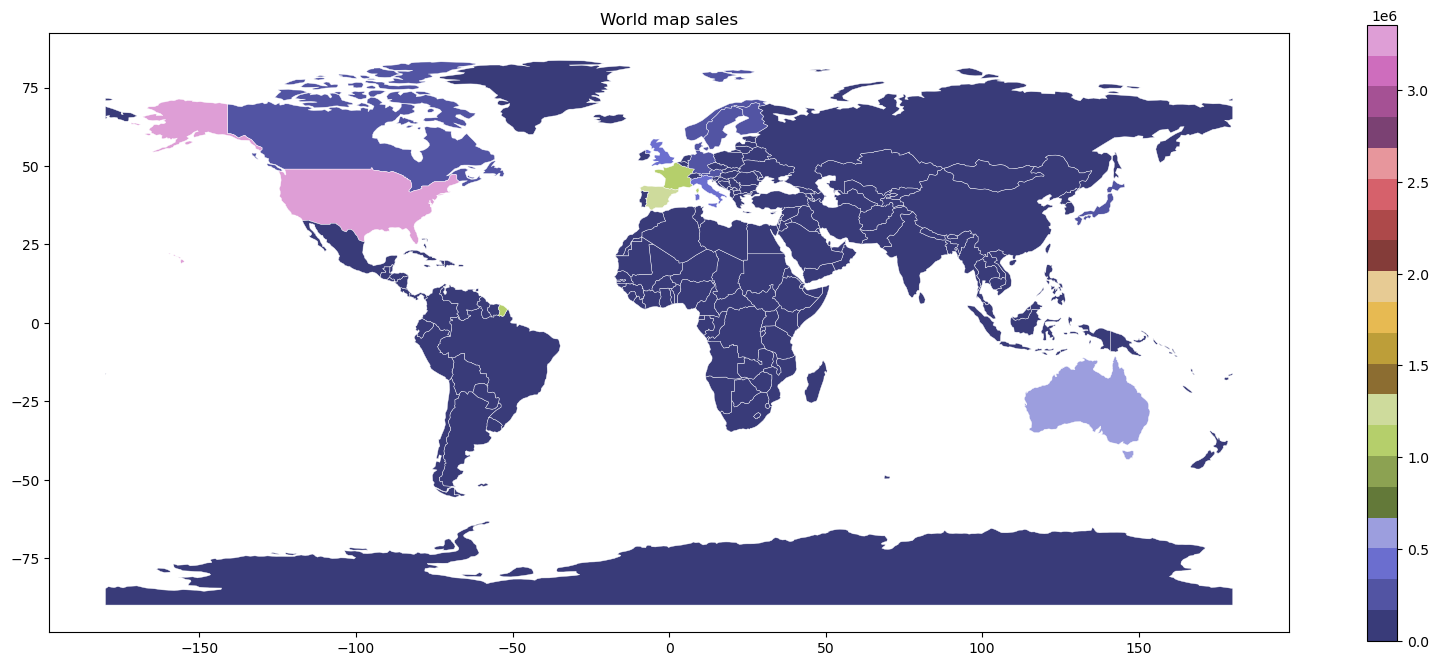

In [12]:
cmap = 'tab20b'
cbar = plt.cm.ScalarMappable(cmap=cmap)
fig, ax = plt.subplots(1, 1, figsize=(20, 8))
gdf.plot(column='sales', cmap=cmap, legend=True, ax=ax, edgecolor="white", linewidths=0.3)
plt.title("World map sales")
plt.show()

## Step 4: Give observations

Từ biểu đồ, ta có thể rút ra được các kết luận sau:
- Doanh số bán hàng chủ yếu tập trung ở Mỹ và các nước châu Âu, cần tập trung nhiều hơn vào những thị trường ở những quốc gia này.
- Một số các khu vực khác mà công ty cũng đang bắt đầu khai thác để tạo ra doanh thu nhiều hơn bao gồm Canada, Úc và một số nước châu Âu.
- Tiếp tục khám phá tiềm năng doanh thu ở các quốc gia châu Á nhiều hơn để tăng doanh thu cho công ty.

# Question: Sự thay đổi doanh thu của từng dòng sản phẩm theo thời gian

## Step 1: Purpose

- Dùng để biết được sự thay đổi của doanh thu theo từng dòng sản phẩm theo thời gian.
- Biết được dòng sản phẩm nào là quan trọng (đóng góp nhiều vào tổng doanh thu cho công ty).
- Biết được xu hướng mua hàng của từng dòng sản phẩm từ đó có thể phân phối kinh doanh hợp lý.

## Step 2: Analyzing

In [53]:
cleaned_df = processed_df.copy()
cleaned_df

product_lines = cleaned_df.productline.unique()
product_lines
cleaned_df = cleaned_df.groupby([cleaned_df['order_date'].dt.year,cleaned_df['order_date'].dt.month,'productline']).sum(numeric_only=True)
cleaned_df.index.names = ['year','month','productline']
cleaned_df = cleaned_df.reset_index()
cleaned_df['order_date'] = pd.to_datetime(dict(year=cleaned_df.year, month=cleaned_df.month, day=1))
cleaned_df

,year,month,productline,order_number,quantity_ordered,price_per_unit,orderline_number,sales,days_since_lastorder,retail_price,order_date
0,2018,1,Classic Cars,101037,334,1308.28,67,41191.78,19277,1298,2018-01-01
1,2018,1,Trains,20208,81,119.18,6,4933.55,6218,120,2018-01-01
2,2018,1,Trucks and Buses,111137,370,1093.72,75,36801.43,23323,1129,2018-01-01
3,2018,1,Vintage Cars,161626,572,1423.77,102,46826.84,30741,1403,2018-01-01
4,2018,2,Classic Cars,30315,120,513.57,31,20464.41,3094,516,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...
174,2020,5,Planes,124990,383,1113.97,91,34272.85,24361,1069,2020-05-01
175,2020,5,Ships,93727,303,830.17,62,26735.01,20656,775,2020-05-01
176,2020,5,Trains,31240,123,234.57,24,10257.87,5691,220,2020-05-01
177,2020,5,Trucks and Buses,229199,832,2253.09,139,89726.28,28771,2258,2020-05-01


## Step 3: Visualization

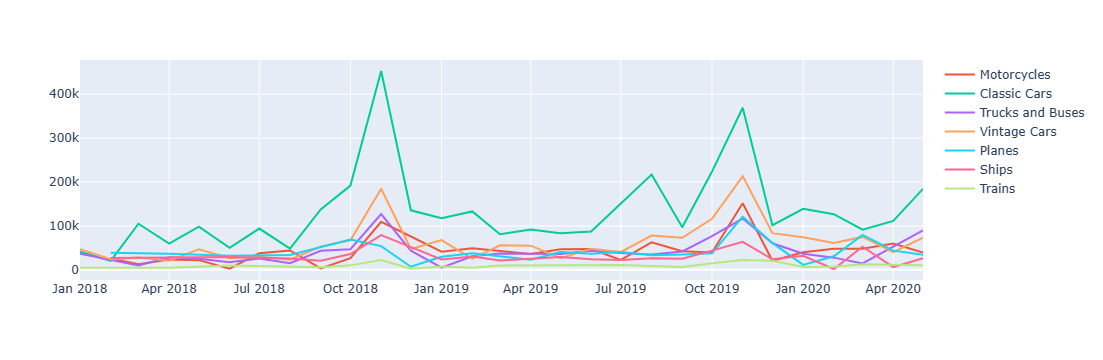

In [54]:
fig = px.line()
for i in range(0,len(product_lines)):
    temp = cleaned_df[cleaned_df['productline']==product_lines[i]][['order_date','sales']].groupby('order_date').sum().reset_index()
    fig.add_scatter(x=temp['order_date'], y=temp["sales"], name=product_lines[i])
fig.show()

## Step 4: Give observations

- Classic Cars là dòng sản phẩm giúp công ty thu về doanh thu cao nhất, tiếp theo đó là các dòng sản phẩm tiệm cận với xe điện như là Vintage Cars, Trucks and Buses, Motorcycles.
- Các dòng sản phẩm như Classic Cars, Trucks and Buses đang có xu hướng tăng trưởng về doanh thu trong thời gian gần đây.
- Ngược lại, Planes đang có xu hướng giảm, Trains không đóng góp nhiều vào doanh thu cho công ty.

# Question: Sự phân phối dữ liệu của cột days_since_lastorder biểu hiện như thế nào?

## Step 1: Purpose

- Dựa vào thuộc tính days_since_lastorder mà ta có thể đánh giá được mức độ trung thành của khách hàng đối với công ty (biết được trong khoảng thời gian bao lâu thì khách hàng mới quay trở lại).

## Step 2: Analyzing

In [56]:
cleaned_df = processed_df.days_since_lastorder
cleaned_df

0        828
1        757
2        703
3        649
4        586
        ... 
2742    2924
2743    2865
2744    2836
2745    2810
2746    2772
Name: days_since_lastorder, Length: 2747, dtype: int64

## Step 3: Visualization

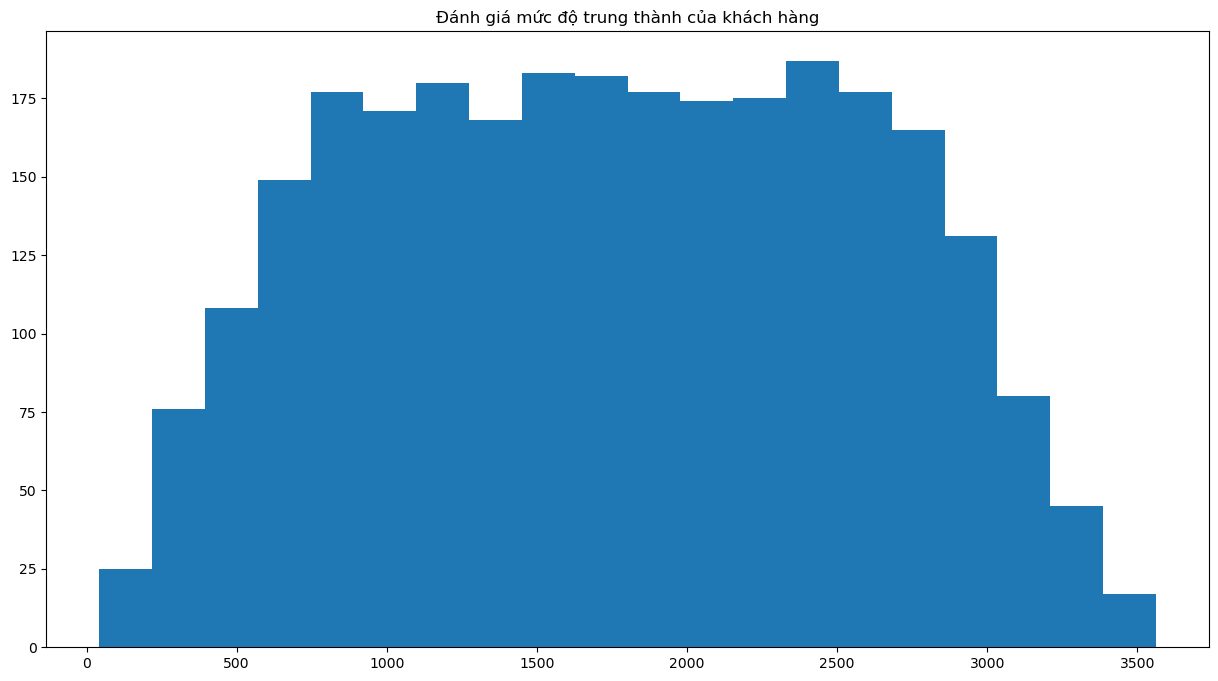

In [57]:
plt.figure(1 , figsize = (15,8))
plt.hist(cleaned_df, bins=20)
plt.title('Đánh giá mức độ trung thành của khách hàng')
plt.show()

## Step 4: Give observations

- Ta thấy sự phân phối của dữ liệu trên cột days_since_lastorder tập trung từ khoảng 1000-2500.

> => Sau khoảng 5 năm thì khách hàng mới quay trở lại mua hàng.


# Question: Liệu có trường hợp nào giá bán cao hơn giá niêm yết của sản phẩm hay không

## Step 1: Purpose

- Vì trường hợp giá bán cao hơn giá niêm yết của sản phẩm sẽ có thể bị xử phạt hành chính nên cần hạn chế để tránh tổn thất cho công ty.

## Step 2: Analyzing

In [58]:
a = ((processed_df['price_per_unit'] / processed_df['retail_price']) > 1).value_counts()[True]

y = np.array([a, processed_df.shape[0]-a])
mylabels = ["Giá bán cao hơn giá niêm yết", ""]
myexplode = [0.1, 0]

## Step 3: Visualization

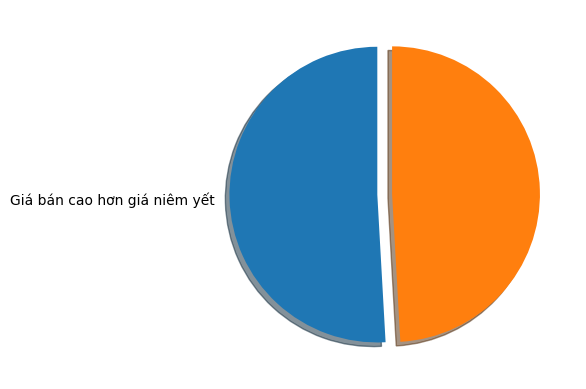

In [59]:
plt.pie(y, labels = mylabels, explode = myexplode, startangle = 90, shadow = True)
plt.show() 

## Step 4: Give observations

- Ta thấy trường hợp giá bán cao hơn giá niêm yết chiếm tới hơn một nửa trong toàn bộ bộ dữ liệu.
> Cần có những tìm hiểu nguyên nhân dẫn đến tình trạng này.
>
> Đưa ra những biện pháp phù hợp để có thể giảm giá bán nhưng vẫn đảm bảo doanh thu cho công ty.

# Question: Sự sai lệch của giá bán so với giá niêm yết

## Step 1: Purpose

- Từ câu hỏi bên trên, ta tìm ra sự sai lệch của giá bán so với giá niêm yết để biết được tình trạng chung của giá bán hiện tại của tất cả các sản phẩm là như thế nào.

## Step 2: Analyzing

In [61]:
cleaned_df = (abs(processed_df['price_per_unit'] - processed_df['retail_price'])/processed_df['retail_price'])

## Step 3: Visualization

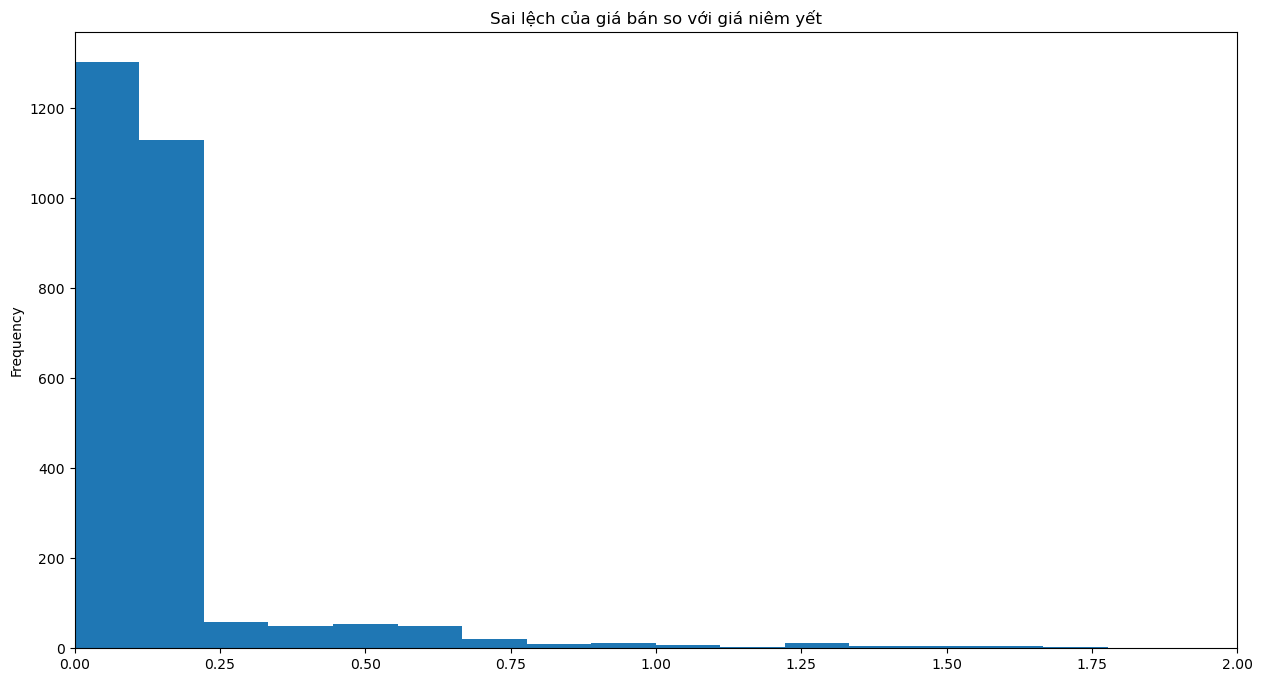

In [68]:
plt.figure(1 , figsize = (15,8))
cleaned_df.plot(kind='hist', bins=60, xlim=(0,2),
                title='Sai lệch của giá bán so với giá niêm yết')
plt.show()

## Step 4: Give observations

- Từ biểu đồ ta có thể rút ra được là sự sai lệch của giá bán và giá niêm yết lý tưởng cho một sản phẩm là khoảng từ 0 - 0.2%

# Question: Phân phối của kích thước đơn hàng biểu hiện như thế nào?

## Step 1: Purpose

- Để có thể biết được sự phân phối của kích thước đơn hàng theo doanh thu là như thế nào, từ đó biết được tiêu chí của công ty khi xác định liệu kích thước đơn hàng đó là nhỏ, trung bình hay lớn.

## Step 2: Analyzing

In [69]:
cleaned_df = processed_df.copy()

## Step 3: Visualization

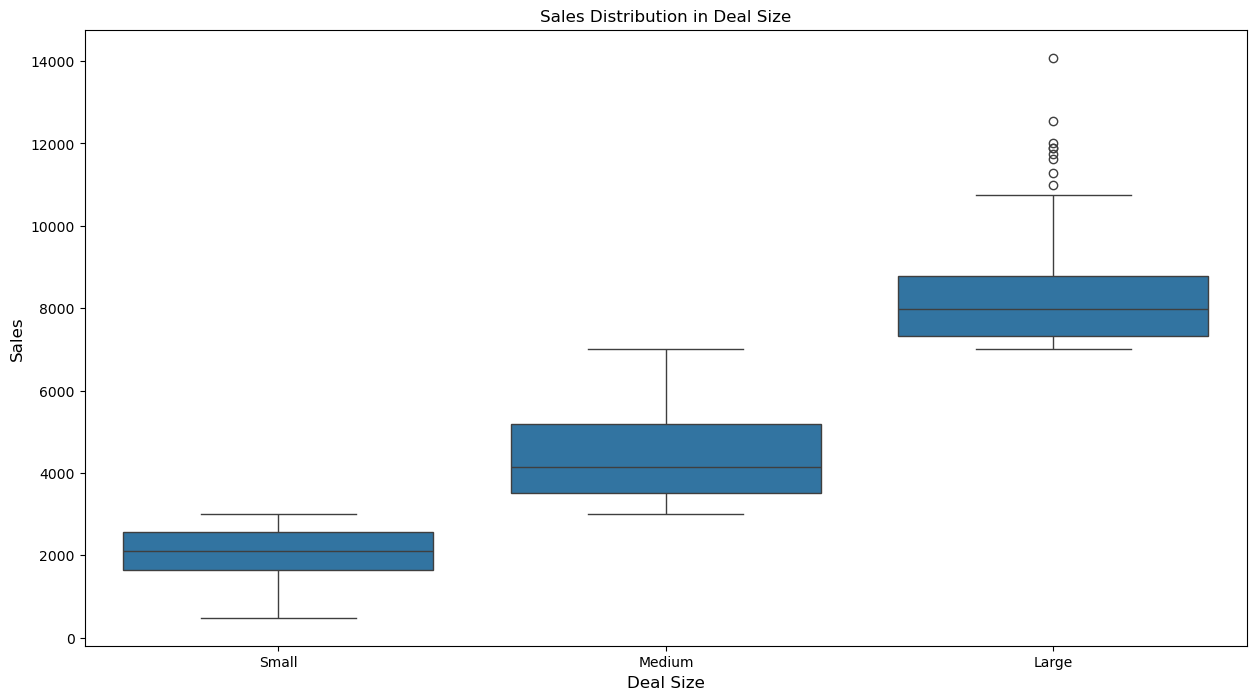

In [70]:
plt.figure(1 , figsize = (15,8))
sns.boxplot(x = 'deal_size' , y = 'sales' , data = cleaned_df, legend=False)
plt.title('Sales Distribution in Deal Size')
plt.xlabel("Deal Size", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.xticks(rotation = 0)
plt.show()

## Step 4: Give observations

- Những đơn hàng nhỏ có doanh thu `< 3000$`
- Những đơn hàng trung bình có doanh thu từ `3000$ - 7000$`
- Những đơn hàng lớn có doanh thu `> 7000$`

# Question: Tương quan của những dữ liệu dạng số

## Step 1: Purpose

- Dùng để xác định mối tương quan của các cột dữ liệu dạng số, từ đó biết được sự phụ thuộc lẫn nhau giữa các thuộc tính trong kinh doanh sản phẩm để tối ưu hóa lợi nhuận cho công ty.

## Step 2: Analyzing

In [22]:
corr = processed_df[['quantity_ordered','price_per_unit','sales','days_since_lastorder','retail_price']].corr(method='pearson')
mask = np.triu(np.ones_like(corr))

## Step 3: Visualization

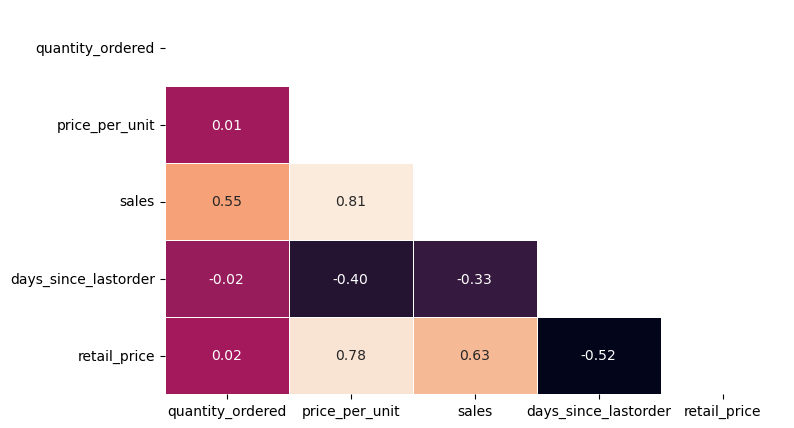

In [23]:
fig = plt.subplots(figsize=(8, 5))
sns.heatmap(corr, annot=True,fmt='.2f',mask=mask, cbar=None, linewidth=0.5)
plt.show()

## Step 4: Give observations

- Vì `sales = price_per_unit * quantity_ordered` nên ta không xét mỗi tương quan giữa 2 thuộc tính bất kỳ trong 3 thuộc tính này.
- Ta thấy khi giá niêm yết tăng lên thì doanh thu cũng có xu hướng tăng theo.
- Khi days_since_lastorder tăng lên thì giá niêm yết sẽ có xu hướng giảm => cung lớn hơn cầu nên giá bán giảm.